# ランダムネットワークにおける部分ネットワークの出現頻度の理論推定
理論に基づいて，ランダムネットワークにおける部分ネットワークの出現頻度の推定を近似式から推定します。

Itzkovitz S, Milo R, Kashtan N, Ziv G and Alon U (2003) Subgraphs in random networks. Phys. Rev. E 68, 026127. https://doi.org/10.1103/PhysRevE.68.026127

In [43]:
import numpy as np
import pandas as pd
import networkx as nx
import igraph
from igraph import Graph as ig
import copy

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ノード数
N = 1000
# エッジの数は2000から10000まで200ずつ増加させていく。
L_seq = range(2000, 10000, 200)

## ランダムネットワークにおける部分ネットワークのカウント   

In [60]:
nb_ffl_real = []# feedforward loop (FFL) の実際の数（観測値）が格納される
nb_ffl_theory  = [] # 近似式から推定されたFFLの数（予測値）が格納される
nb_fbl_real = []  # feedback loop (FBL) の実際の数（観測値）が格納される
nb_fbl_theory = [] # 近似式から推定されたFBLの数（予測値）が格納される


for L in L_seq:
    g =  ig.Static_Power_Law(N, L, 2.1, 2.1)

    g_one_way = copy.deepcopy(g)
    g_mutual = copy.deepcopy(g)

    g_one_way.delete_edges(es for es in g_one_way.es if es.is_mutual())
    g_mutual.delete_edges(es for es in g_mutual.es if es.is_mutual())

    M = np.array(g_mutual.degree(mode="out"))
    K = np.array(g_one_way.degree(mode="out"))
    R = np.array(g_one_way.degree(mode="in"))

    motif_Real = g.motifs_randesu(3)

    nb_ffl_real.append(motif_Real[8])
    nb_fbl_real.append(motif_Real[12])

    nb_ffl_theory.append(np.mean(K * (K - 1)) * np.mean(K * R) * np.mean(R * (R - 1))/np.mean(K)**3)
    nb_fbl_theory.append(np.mean(K*R) ** 3 / np.mean(K)**3 / 3)

## 結果のプロット

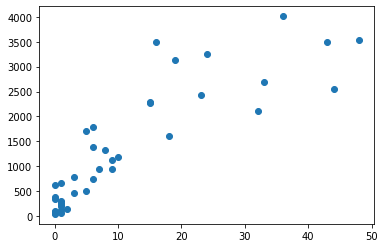

In [71]:
plt.scatter(nb_ffl_real, nb_ffl_theory,)

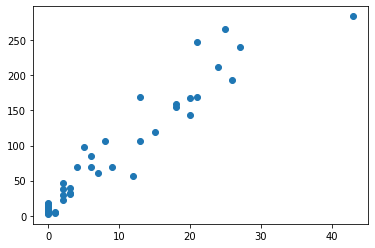

In [70]:
plt.scatter(nb_fbl_real, nb_fbl_theory,)